# Material selection using ML

In [2]:
import pandas as pd

In [ ]:
df = pd.read_csv("data.csv")

In [19]:
df['Material'] = df[['Std', 'Material', 'Heat treatment']].fillna('').agg(' '.join, axis=1)

In [20]:
df['Sy'] = df['Sy'].str.replace(' max', '').astype(int)

In [21]:
df.drop(['Std','ID', 'Heat treatment', 'Desc','pH','Desc','HV'], axis=1, inplace=True)
df.head()

,Material,Su,Sy,A5,Bhn,E,G,mu,Ro
0,ANSI Steel SAE 1015 as-rolled,421,314,39.0,126.0,207000,79000,0.3,7860
1,ANSI Steel SAE 1015 normalized,424,324,37.0,121.0,207000,79000,0.3,7860
2,ANSI Steel SAE 1015 annealed,386,284,37.0,111.0,207000,79000,0.3,7860
3,ANSI Steel SAE 1020 as-rolled,448,331,36.0,143.0,207000,79000,0.3,7860
4,ANSI Steel SAE 1020 normalized,441,346,35.8,131.0,207000,79000,0.3,7860


In [7]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('Material', axis=1)


In [32]:
X.head()

,Su,Sy,A5,Bhn,E,G,mu,Ro
0,421,314,39.0,126.0,207000,79000,0.3,7860
1,424,324,37.0,121.0,207000,79000,0.3,7860
2,386,284,37.0,111.0,207000,79000,0.3,7860
3,448,331,36.0,143.0,207000,79000,0.3,7860
4,441,346,35.8,131.0,207000,79000,0.3,7860


In [33]:
y = df['Material']

In [26]:
y.head()

0     ANSI Steel SAE 1015 as-rolled
1    ANSI Steel SAE 1015 normalized
2      ANSI Steel SAE 1015 annealed
3     ANSI Steel SAE 1020 as-rolled
4    ANSI Steel SAE 1020 normalized
Name: Material, dtype: object

In [55]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [60]:
# Take user input in your order
print("Enter the following material properties:")
su = float(input("Ultimate Tensile Strength (MPa): "))
sy = float(input("Yield Strength (MPa): "))
a5 = float(input("Elongation at Break (%): "))
bhn = float(input("Brinell Hardness Number: "))
e = float(input("Elastic Modulus (MPa): "))
g = float(input("Shear Modulus (MPa): "))
mu = float(input("Poisson's Ratio: "))
ro = float(input("Density (kg/m³): "))

# Form input as DataFrame
user_input = pd.DataFrame([{
    'Su': su,
    'Sy': sy,
    'A5': a5,
    'Bhn': bhn,
    'E': e,
    'G': g,
    'mu': mu,
    'Ro': ro
}])

# Predict
prediction = model.predict(user_input)
print("\nPredicted Suitable Material:", prediction[0])


Enter the following material properties:


Ultimate Tensile Strength (MPa):  900
Yield Strength (MPa):  700
Elongation at Break (%):  15.0
Brinell Hardness Number:  250
Elastic Modulus (MPa):  210000
Shear Modulus (MPa):  80000
Poisson's Ratio:  0.3
Density (kg/m³):  7850



Predicted Suitable Material: CSN CSN 15241 heat treated


# Mild_Steel_Input

In [ ]:
Enter the following material properties:
Ultimate Tensile Strength (MPa):  421
Yield Strength (MPa):  315
Elongation at Break (%):  39.0
Brinell Hardness Number:  126.0
Elastic Modulus (MPa):  207000
Shear Modulus (MPa):  79000
Poisson's Ratio:  0.3
Density (kg/m³):  7860

Predicted Suitable Material: ANSI Steel SAE 1015 as-rolled

# Aluminum_Input

In [ ]:
Enter the following material properties:
Ultimate Tensile Strength (MPa):  310
Yield Strength (MPa):  250
Elongation at Break (%):  12.0
Brinell Hardness Number:  95.0
Elastic Modulus (MPa):  70000
Shear Modulus (MPa):  26000
Poisson's Ratio:  0.33
Density (kg/m³):  2700

Predicted Suitable Material: ANSI Aluminum Alloy 5254-H36 Wrought

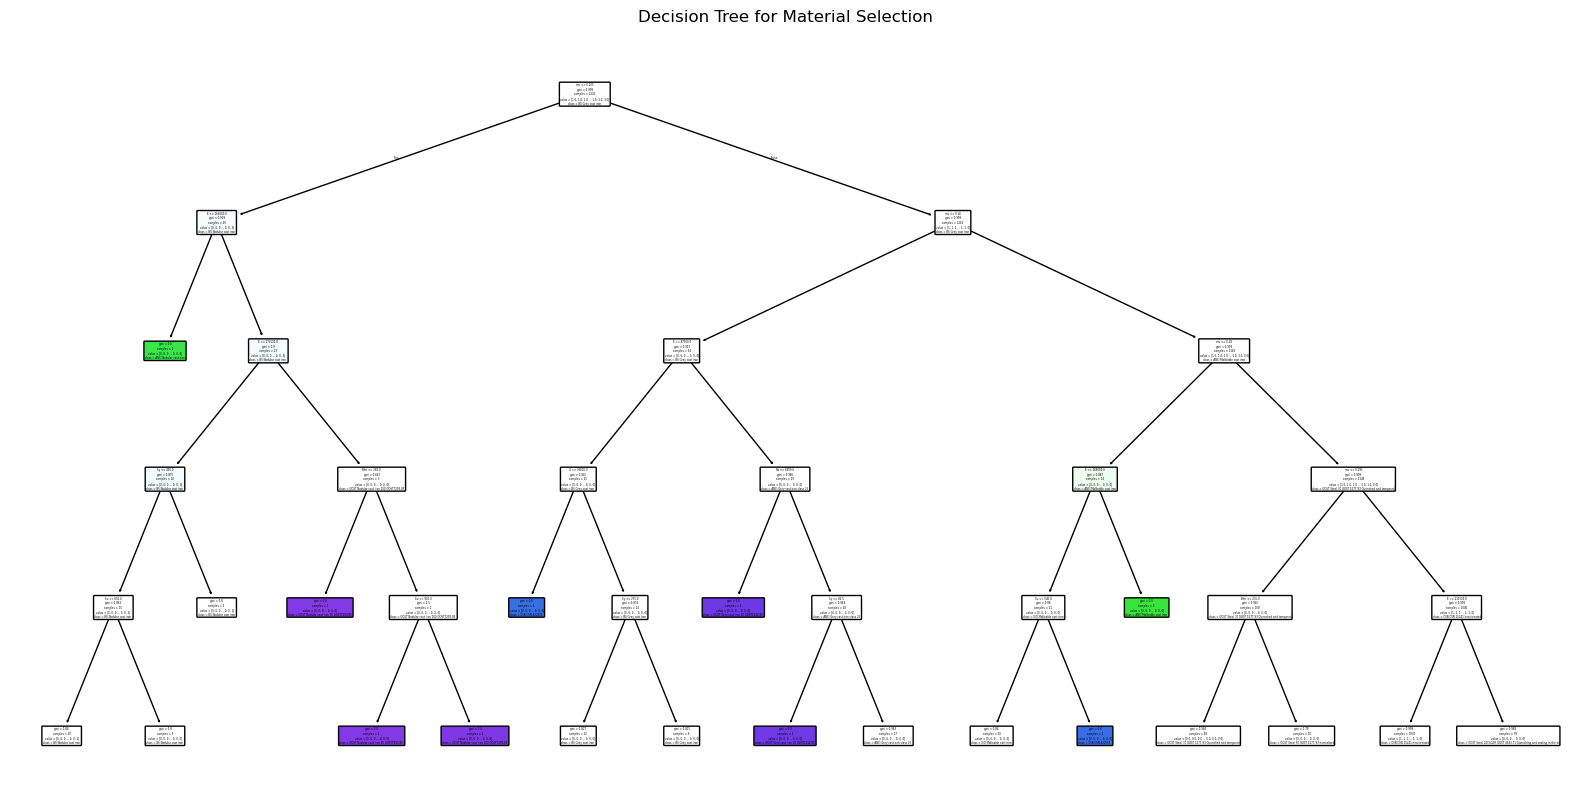

In [64]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=features, class_names=model.classes_, filled=True, rounded=True)
plt.title("Decision Tree for Material Selection")
plt.show()
